# How to use the Converter class from PyStoG

This tutorial shows how to use the `Converter` class from `pystog`

In [1]:
import numpy as np
from pystog import Converter

## Converting real space functions

To use the `converter` class, we first need some data. Lets load in some test data for Argon from our test suite. 
We are going to extract the $r$ and $g(r)$ from small molecular dynamics simualtions generated using [LAMMPS](https://lammps.sandia.gov/). 

In [2]:
i, r, gr, nr = np.loadtxt("../data/test_data/argon.gr", unpack=True, skiprows=5)

Let's look at the data that we imported:

<IPython.core.display.Javascript object>


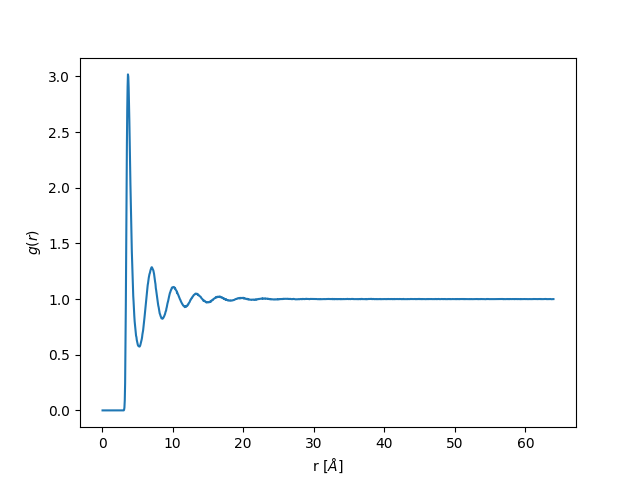

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(r, gr)
plt.ylabel("$g(r)$")
plt.xlabel("r [$\AA$]")
plt.show()

Okay, now we create an instance of a `converter` object using the `Converter` class:

In [4]:
converter = Converter()

We need to pass in some material-specific information to the converter
functions. Here is a dictionary of the values we need. There is also a testing
utility class `Argon` with these values for the dataset found [here](https://github.com/marshallmcdonnell/pystog/blob/master/tests/materials.py).

In [5]:
kwargs = {"rho": 0.02138, 
          "<b_coh>^2": 3.644, 
          "<b_tot^2>": 5.435
         }

We now have the functions available to convert our $g(r)$ function to other real space functions:

In [6]:
GofR, dGofR = converter.g_to_G(r, gr, **kwargs)
GKofR, dGKofR = converter.g_to_GK(r, gr, **kwargs)

Now we can plot the three functions to compare:

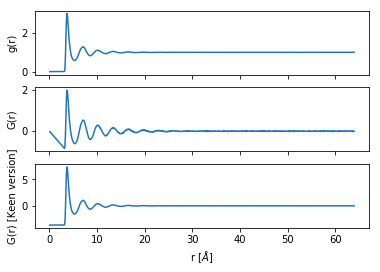

In [7]:
#Creates two subplots and unpacks the output array immediately
%matplotlib inline
import matplotlib.pyplot as plt

f, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(r, gr)
ax[0].set_ylabel('g(r)')

ax[1].plot(r, GofR)
ax[1].set_ylabel('G(r)')

ax[2].plot(r, GKofR)
ax[2].set_ylabel('G(r) [Keen version]')
ax[2].set_xlabel('r [$\AA$]')
plt.show()

## Converting reciprocal space functions

In [8]:
converter = Converter()

Now let us load in some reciprocal space test data for Argon from our test suite. 
We are going to extract the $Q$ and $S(Q)$. These are actually generated from the above 
real space functions, just using the `Transformer` class in PystoG.

In [9]:
q, sq = np.loadtxt("../data/test_data/argon.reciprocal_space.dat", unpack=True, skiprows=2, usecols=(0,1))
q = q[5:]
sq = sq[5:]

Add lets look at the data we imported:

<IPython.core.display.Javascript object>


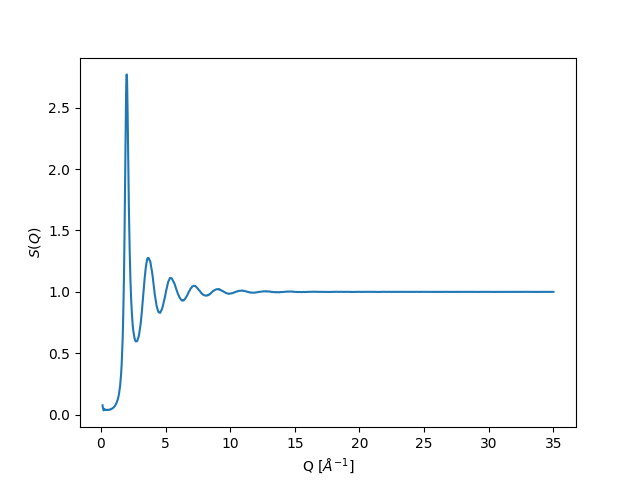

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(q, sq)
plt.ylabel('$S(Q)$')
plt.xlabel('Q [$\AA^{-1}$]')
plt.show()

Again, we need to pass in some material-specific information to the converter
functions. We replicate the `kwargs` just for convenience here:

In [11]:
kwargs = {"rho": 0.02138, 
          "<b_coh>^2": 3.644, 
          "<b_tot^2>": 5.435
         }

In [12]:
fq, dfq = converter.S_to_F(q, sq, **kwargs)
fq_keen, dfq_keen = converter.S_to_FK(q, sq, **kwargs)
dcs, ddcs = converter.S_to_DCS(q, sq, **kwargs)


Now we can plot the functions to compare:

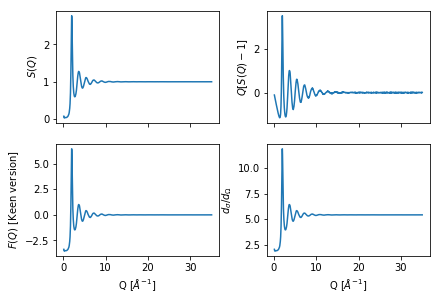

In [13]:
#Creates two subplots and unpacks the output array immediately
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 2, sharex=True)
f.tight_layout()
xlabel = 'Q [$\AA^{-1}$]'

ax[0, 0].plot(q, sq)
ax[0, 0].set_ylabel('$S(Q)$')

ax[0, 1].plot(q, fq)
ax[0, 1].set_ylabel('$Q[S(Q)-1]$')
ax[1, 1].set_xlabel(xlabel)

ax[1, 0].plot(q, fq_keen)
ax[1, 0].set_ylabel('$F(Q)$ [Keen version]')
ax[1, 0].set_xlabel(xlabel)

ax[1, 1].plot(q, dcs)
ax[1, 1].set_ylabel('$d_{\sigma} / d_{\Omega}$')
ax[1, 1].set_xlabel(xlabel)
plt.show()
